In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("C:/Users/huawei/Desktop/Nova_Financial_Solutions/Data/raw_analyst_ratings.csv")

In [3]:

# Display the first few rows of the data to get an idea of its structure
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# Count the occurrences of each publisher
publisher_counts = data["publisher"].value_counts()

# Display the top 10 publishers
top_publishers = publisher_counts.head(10)
print(top_publishers)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [6]:
# Extract the domain from email addresses
def extract_domain(email):
    match = re.search(r"@[\w.]+", email)
    if match:
        return match.group()[1:]
    return email

# Apply the extract_domain function to the publisher column
data["publisher_domain"] = data["publisher"].apply(extract_domain)

# Count the occurrences of each publisher domain
domain_counts = data["publisher_domain"].value_counts()

# Display the top 10 publisher domains
top_domains = domain_counts.head(10)
print(top_domains)

publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


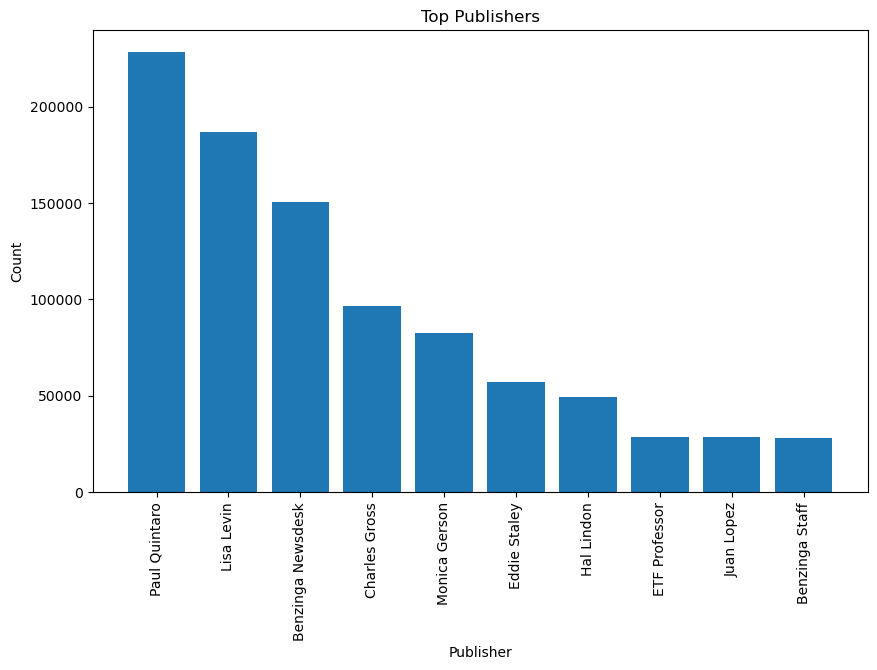

In [8]:
# Create a bar chart of the top publishers
plt.figure(figsize=(10, 6))
plt.bar(top_publishers.index, top_publishers.values)
plt.xticks(rotation=90)
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.title("Top Publishers")
plt.show()

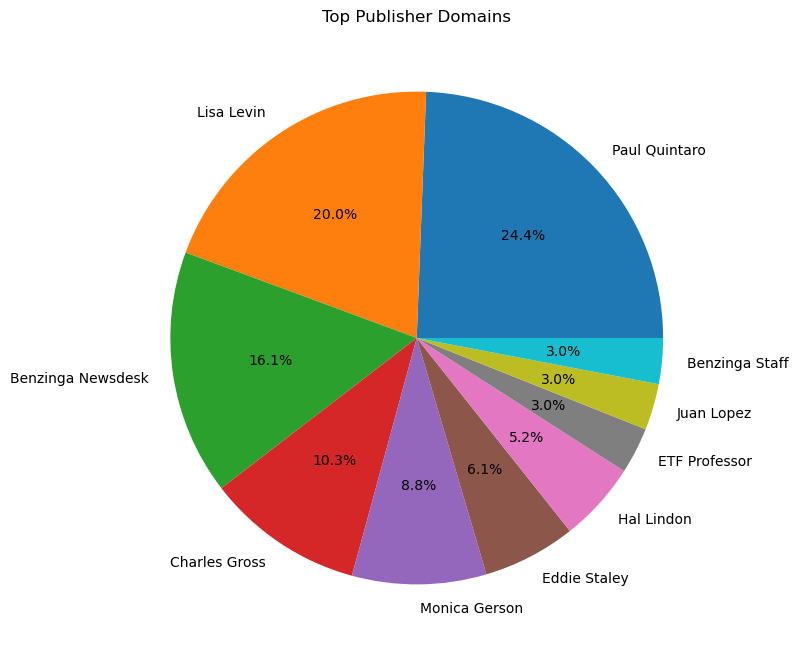

In [9]:
# Create a pie chart of the top publisher domains
plt.figure(figsize=(8, 8))
plt.pie(top_domains.values, labels=top_domains.index, autopct="%1.1f%%")
plt.title("Top Publisher Domains")
plt.show()

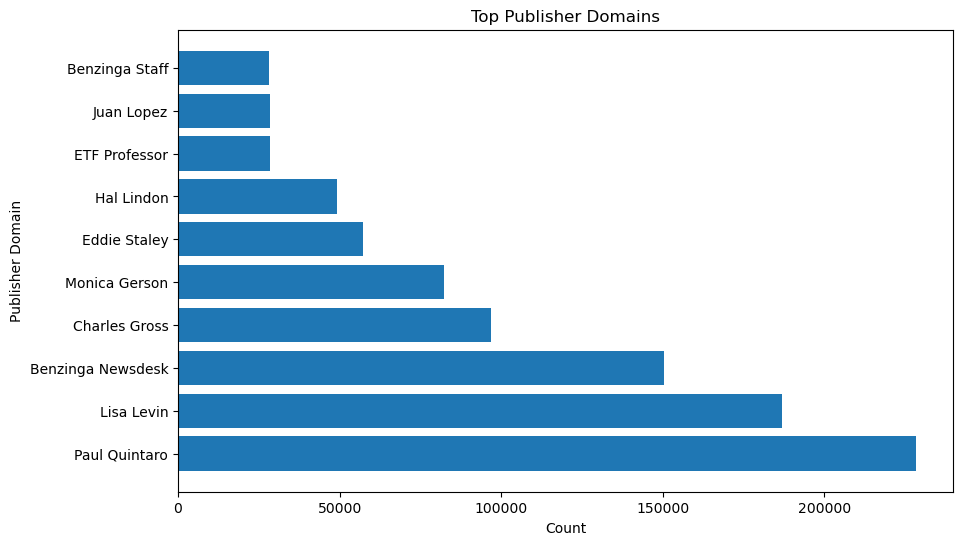

In [10]:
# Create a horizontal bar chart of the top publisher domains
plt.figure(figsize=(10, 6))
plt.barh(top_domains.index, top_domains.values)
plt.xlabel("Count")
plt.ylabel("Publisher Domain")
plt.title("Top Publisher Domains")
plt.show()